In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [71]:
# Load the dataset
data = pd.read_csv('cs Dataset3.csv')

In [72]:
# Adjust pandas settings to display the dataset in a cleaner format
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)       # Adjust column width
pd.set_option('display.max_rows', 20)      # Limit row output


In [73]:
data.head()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,Role
0,6,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0.714603,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746,Database Administrator
1,6,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0.617218,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424,Database Administrator
2,6,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0.814072,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024,Database Administrator
3,6,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0.607495,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119,Database Administrator
4,6,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0.781293,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287,Database Administrator


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Database Fundamentals            9179 non-null   int64  
 1   Computer Architecture            9179 non-null   int64  
 2   Distributed Computing Systems    9179 non-null   int64  
 3   Cyber Security                   9179 non-null   int64  
 4   Networking                       9179 non-null   int64  
 5   Software Development             9179 non-null   int64  
 6   Programming Skills               9179 non-null   int64  
 7   Project Management               9179 non-null   int64  
 8   Computer Forensics Fundamentals  9179 non-null   int64  
 9   Technical Communication          9179 non-null   int64  
 10  AI ML                            9179 non-null   int64  
 11  Software Engineering             9179 non-null   int64  
 12  Business Analysis   

In [75]:
data.isnull().sum()

Database Fundamentals            0
Computer Architecture            0
Distributed Computing Systems    0
Cyber Security                   0
Networking                       0
                                ..
Openness to Change               0
Hedonism                         0
Self-enhancement                 0
Self-transcendence               0
Role                             0
Length: 28, dtype: int64

In [105]:
# Filter the rows where Role is 'AI ML Specialist'
ai_ml_specialist_rows = data[data['Role'] == 'AI ML Specialist']

# Select the first 540 rows where Role is 'AI ML Specialist'
ai_ml_specialist_to_remove = ai_ml_specialist_rows.head(540)

# Remove the selected rows from the original dataframe
data_filtered = data.drop(ai_ml_specialist_to_remove.index)

# Verify if rows are removed by checking the value counts
print(data_filtered['Role'].value_counts())


Role
Database Administrator             540
Hardware Engineer                  540
Application Support Engineer       540
Cyber Security Specialist          540
Networking Engineer                540
Software Developer                 540
API Specialist                     540
Project Manager                    540
Information Security Specialist    540
Technical Writer                   540
Software tester                    540
Business Analyst                   540
Customer Service Executive         540
AI ML Specialist                   540
Helpdesk Engineer                  540
Graphics Designer                  539
Name: count, dtype: int64


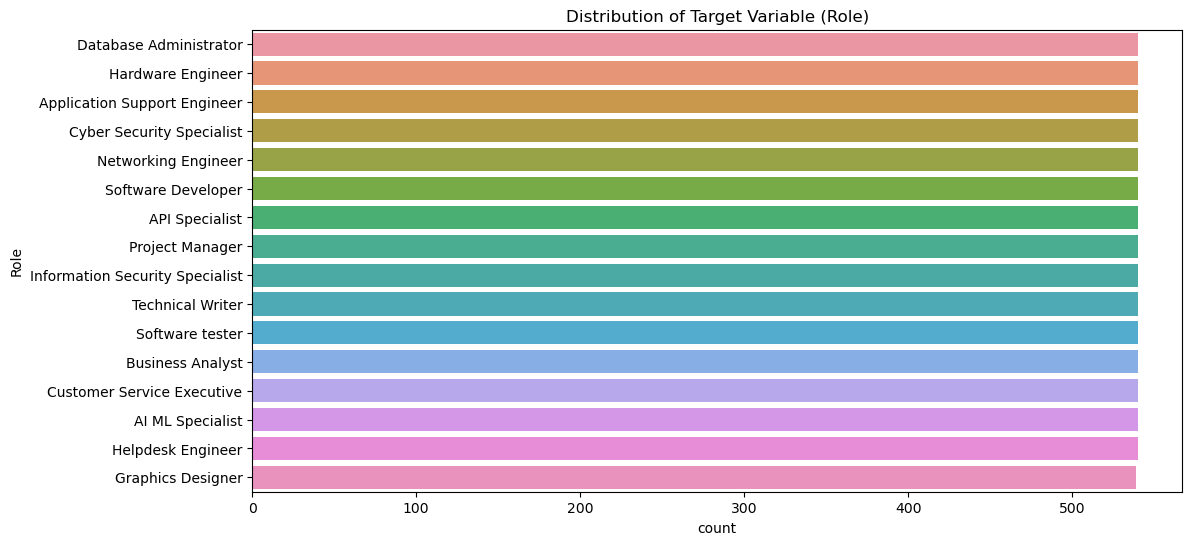

In [108]:
# 3. Distribution of the target variable
role_distribution = data_filtered['Role'].value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(y=data_filtered['Role'], order=role_distribution.index)
plt.title('Distribution of Target Variable (Role)')
plt.show()

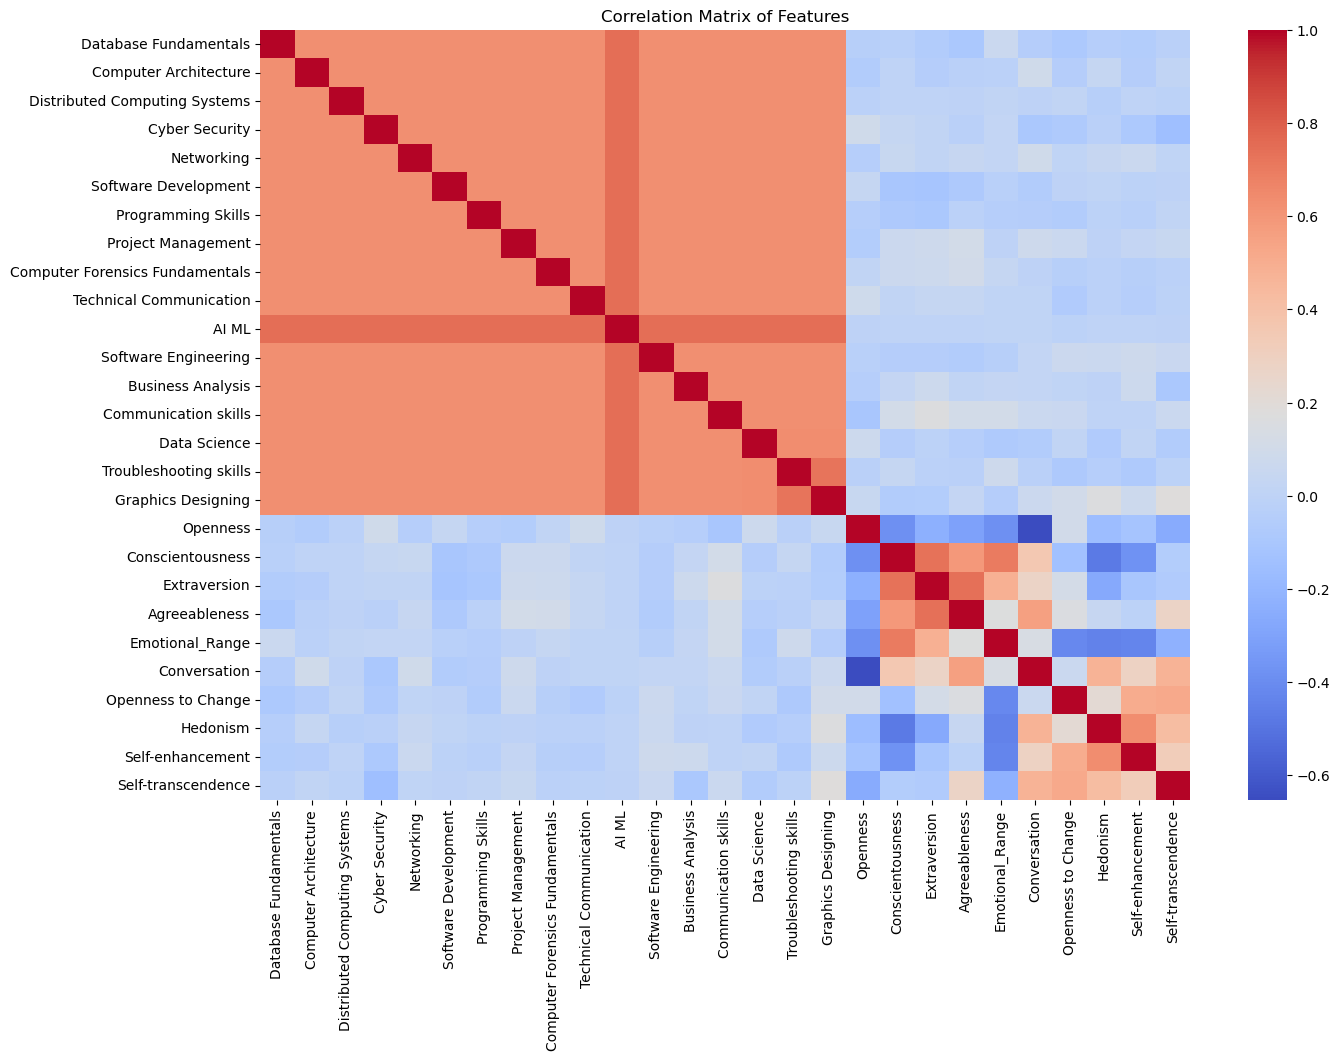

In [111]:
# 4. Correlation matrix
correlation_matrix = data_filtered.iloc[:, :-1].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Features')
plt.show()


In [112]:

# Data Preprocessing
# 1. Define features (X) and target (y)
X = data_filtered.drop(columns=['Role'])
y = data_filtered['Role']

In [113]:
# 2. Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [114]:
# 3. Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)


In [115]:
X_train.shape

(6047, 27)

In [116]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}


In [117]:
# Store results in a dictionary
results = {'Model': [], 'Accuracy': []}



Random Forest Classification Report:

                                 precision    recall  f1-score   support

               AI ML Specialist       1.00      1.00      1.00       162
                 API Specialist       1.00      1.00      1.00       162
   Application Support Engineer       1.00      1.00      1.00       162
               Business Analyst       1.00      1.00      1.00       162
     Customer Service Executive       1.00      1.00      1.00       162
      Cyber Security Specialist       1.00      1.00      1.00       162
         Database Administrator       1.00      1.00      1.00       162
              Graphics Designer       1.00      1.00      1.00       162
              Hardware Engineer       1.00      1.00      1.00       162
              Helpdesk Engineer       1.00      1.00      1.00       162
Information Security Specialist       1.00      1.00      1.00       162
            Networking Engineer       1.00      1.00      1.00       162
           

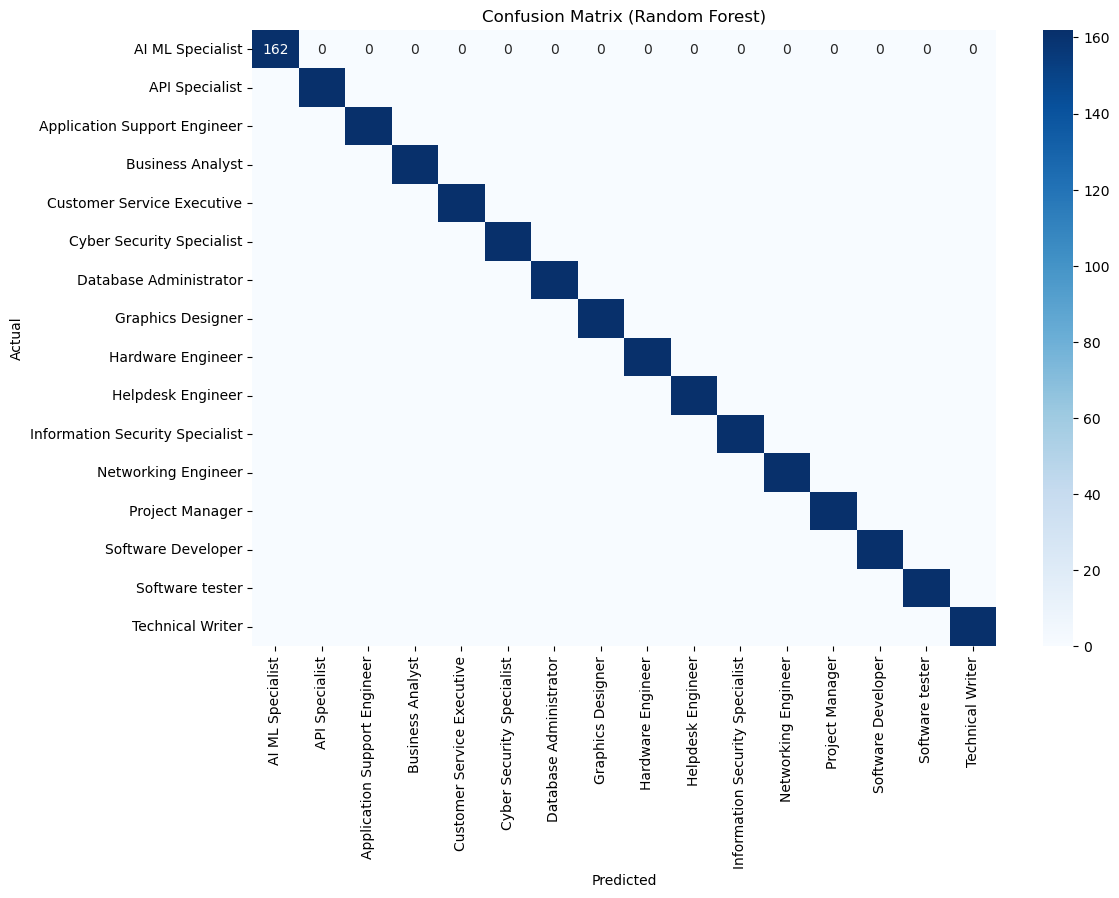


Logistic Regression Classification Report:

                                 precision    recall  f1-score   support

               AI ML Specialist       1.00      1.00      1.00       162
                 API Specialist       1.00      1.00      1.00       162
   Application Support Engineer       1.00      1.00      1.00       162
               Business Analyst       1.00      1.00      1.00       162
     Customer Service Executive       1.00      1.00      1.00       162
      Cyber Security Specialist       1.00      1.00      1.00       162
         Database Administrator       1.00      1.00      1.00       162
              Graphics Designer       1.00      1.00      1.00       162
              Hardware Engineer       1.00      1.00      1.00       162
              Helpdesk Engineer       1.00      1.00      1.00       162
Information Security Specialist       1.00      1.00      1.00       162
            Networking Engineer       1.00      1.00      1.00       162
     

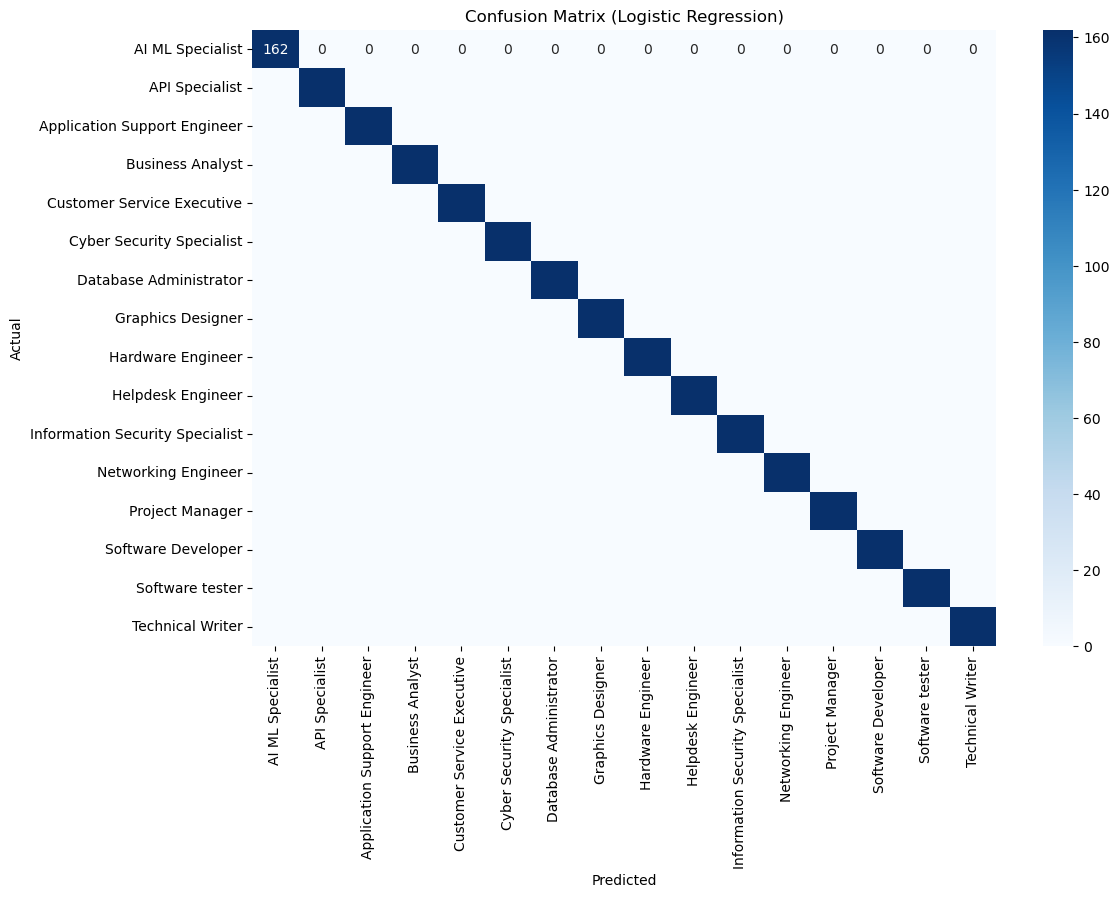


K-Nearest Neighbors Classification Report:

                                 precision    recall  f1-score   support

               AI ML Specialist       0.67      0.98      0.80       162
                 API Specialist       0.77      0.98      0.86       162
   Application Support Engineer       0.79      0.93      0.85       162
               Business Analyst       0.89      0.91      0.90       162
     Customer Service Executive       0.95      0.94      0.95       162
      Cyber Security Specialist       0.93      0.88      0.90       162
         Database Administrator       0.97      0.90      0.93       162
              Graphics Designer       0.99      0.91      0.95       162
              Hardware Engineer       0.98      0.91      0.94       162
              Helpdesk Engineer       1.00      0.91      0.95       162
Information Security Specialist       0.99      0.91      0.95       162
            Networking Engineer       0.99      0.92      0.95       162
     

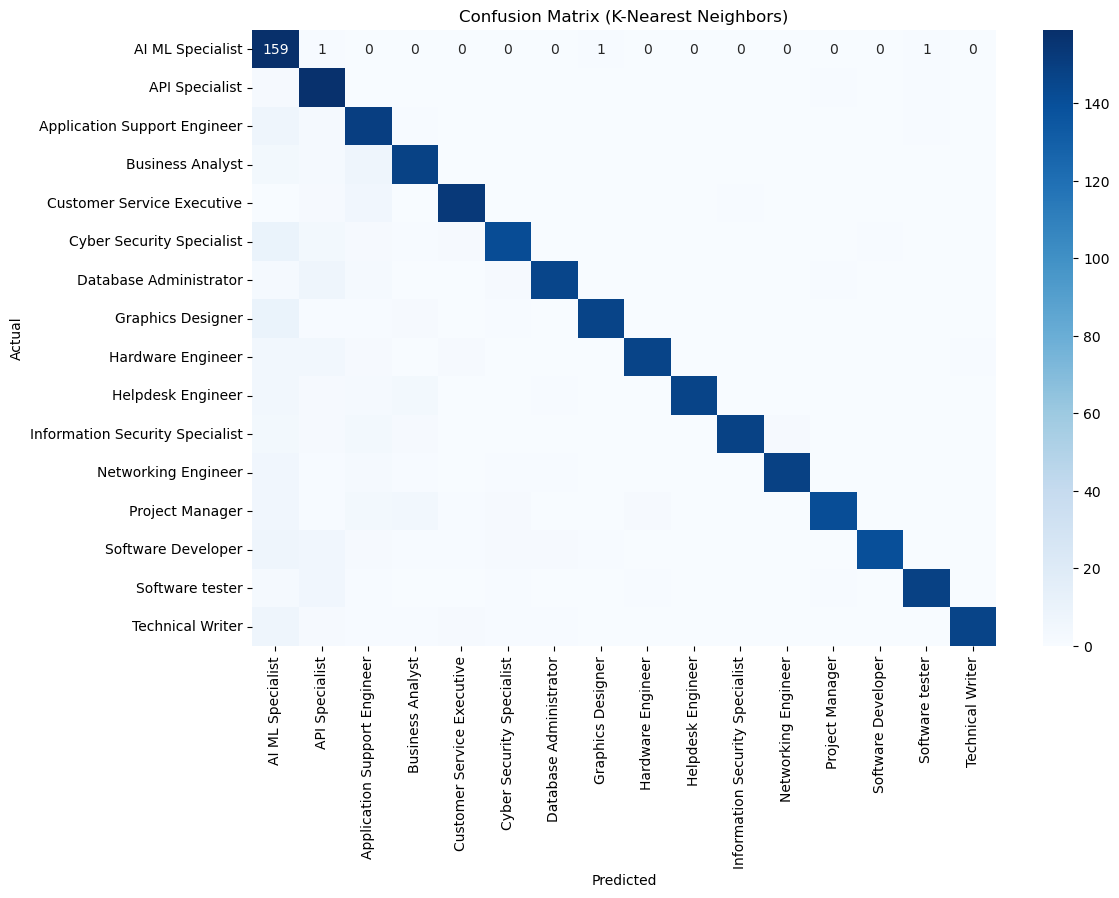

In [118]:
# Training and evaluation for each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions and accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy * 100)
    
    # Classification report
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [119]:
# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print("\nModel Accuracy Comparison:")
print(results_df)



Model Accuracy Comparison:
                 Model    Accuracy
0        Random Forest  100.000000
1  Logistic Regression  100.000000
2  K-Nearest Neighbors   91.473765


In [120]:
# Example input (replace with your own values)
# Example input (replace with your own values)
new_input = {
    'Skill_1': [1],  # Range 0 to 10
    'Skill_2': [3],  # Range 0 to 10
    'Skill_3': [7],  # Range 0 to 10
    'Skill_4': [8],  # Range 0 to 10
    'Skill_5': [10],  # Range 0 to 10
    'Skill_6': [2],  # Range 0 to 10
    'Skill_7': [9],  # Range 0 to 10
    'Skill_8': [6],  # Range 0 to 10
    'Skill_9': [10], # Range 0 to 10
    'Skill_10': [1], # Range 0 to 10
    'Skill_11': [3], # Range 0 to 10
    'Skill_12': [5], # Range 0 to 10
    'Skill_13': [4], # Range 0 to 10
    'Skill_14': [7], # Range 0 to 10
    'Skill_15': [2], # Range 0 to 10
    'Skill_16': [6], # Range 0 to 10
    'Skill_17': [8], # Range 0 to 10
    'Attribute_1': [0.8],  # Range 0.0 to 1.0
    'Attribute_2': [0.4],  # Range 0.0 to 1.0
    'Attribute_3': [0.9],  # Range 0.0 to 1.0
    'Attribute_4': [0.6],  # Range 0.0 to 1.0
    'Attribute_5': [0.7],  # Range 0.0 to 1.0
    'Attribute_6': [0.3],  # Range 0.0 to 1.0
    'Attribute_7': [0.5],  # Range 0.0 to 1.0
    'Attribute_8': [0.8],  # Range 0.0 to 1.0
    'Attribute_9': [0.2],  # Range 0.0 to 1.0
    'Attribute_10': [0.9]  # Range 0.0 to 1.0
}

In [121]:
# Convert to DataFrame
new_input_df = pd.DataFrame(new_input)
print(f"\nDataset columns: {data.columns}")



Dataset columns: Index(['Database Fundamentals', 'Computer Architecture', 'Distributed Computing Systems', 'Cyber Security', 'Networking', 'Software Development', 'Programming Skills', 'Project Management', 'Computer Forensics Fundamentals', 'Technical Communication', 'AI ML', 'Software Engineering', 'Business Analysis', 'Communication skills', 'Data Science', 'Troubleshooting skills', 'Graphics Designing', 'Openness', 'Conscientousness', 'Extraversion', 'Agreeableness', 'Emotional_Range', 'Conversation', 'Openness to Change', 'Hedonism', 'Self-enhancement', 'Self-transcendence', 'Role'], dtype='object')


In [122]:
# Ensure the new input has the same columns as the training data
train_columns = X.columns
new_input_df = new_input_df.reindex(columns=train_columns, fill_value=0)

In [123]:
# Predict the target using the trained models (for example, Random Forest)
for model_name, model in models.items():
    new_prediction = model.predict(new_input_df)
    predicted_role = label_encoder.inverse_transform(new_prediction)
    print(f"The predicted role for the input data ({model_name}) is: {predicted_role[0]}")

The predicted role for the input data (Random Forest) is: Cyber Security Specialist
The predicted role for the input data (Logistic Regression) is: Helpdesk Engineer
The predicted role for the input data (K-Nearest Neighbors) is: API Specialist


In [124]:
# Save the filtered dataframe to a new CSV file
data_filtered.to_csv('data_filtered.csv', index=False)

